# **Practica 1: Part 1/3**

## Main objective

Test two main assumptions using bitcoin dataset:

- Are Bitcoin returns independent?
  
- Do the logarithms of Bitcoin returns form a bell-shaped curve (Normal distribution)? 

## Points to review:

- Read in the Bitcoin data from  le Crypto data.csv. Then, assess the stationarity of the (raw) Bitcoin prices.
  
- Create a function to transform the Bitcoin prices into their negative log returns counterparts. Plot the latter series and assess their stationarity. To compare the series, also plot the negative log returns on a common scale.

- Are the negative log returns normally distributed? Draw histograms, check QQ-plots and use an Anderson-Darling testing procedure to answer this question.

- Fit a t-distribution to the negative log returns using `fitdistr()`. Using a QQ-plot, decide whether the  t is better than with a Normal distribution, based on your answer in (c).

- Compare the tails of the densities of the t-distribution and the normal distribution. Can we expect more extreme, unexpected events in t-distribution or in normal distribution? What can you conclude about the extreme events of our bitcoin data?

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [44]:
print(os.getcwd())

/Users/fernandacladeramelgar/Documents/1_UNIL_Master/3rd_Semester/UNIL_Risk_Analysis/05_Project/RiskAnalytics


In [45]:
df=pd.read_csv('Data/Crypto_data.csv')
df.head(10)

,Bitcoin,Ethereum
0,47313.351429,3401.124391
1,47243.930233,3394.598122
2,47197.271429,3388.819805
3,47207.945714,3386.160193
4,47206.347143,3381.048514
5,47224.805714,3342.820000
6,47197.925714,3336.385714
7,47188.654286,3329.896667
8,47159.314286,3328.008333
9,47149.398571,3329.112857


In [46]:
df.describe()

,Bitcoin,Ethereum
count,1440.000000,1440.000000
mean,44623.731692,3119.070524
std,1203.376918,93.536776
min,42577.000000,2933.651429
25%,43733.510804,3046.853571
50%,44060.644286,3099.780000
75%,45585.486429,3189.078214
max,47313.351429,3401.124391


## a) Read the Bitcoin data from Cryptodata and check stationarity of raw prices


- Stationarity is a fundamental assumption for most time series models. A stationary time series has constant statistical properties (mean, variance, autocorrelation) over time, making it predictable and easier to model.

- Financial time series, like Bitcoin prices, are often non-stationary due to trends or growth over time. Identifying non-stationarity allows us to apply appropriate transformations (e.g. differencing, log returns) to make the series stationary.

- **Why non-stationarity is a problem?** Non-stationary data can lead to spurious results in models, as trends or varying variances bias the relationships.

- Augmented Dickey-Fuller (ADF) Test: The ADF test is commonly used to check stationarity. It test the null hypothesis (H0) that the series is non.stationary against the alternative (H1) that it is stationary. If the p-value<0.05, we reject H0, concluding the series is stationary.


### Why use the Augmented Dickey-Fuller (ADF) test?
This is a standard test used to check the stationarity in time series data, but is not the only test available.

**Why are we taking the ADF Test?**

- The ADF Test helps us determine if the time series is stationary or non-stationary by analyzing its underlying trend and autocorrelation.

- It is particularly suited for financial time series data, such as Bitcoin prices, where we often encounter non-stationarity due to trends or growth over time.

### Are there other test for Stationarity?

**KPSS Test (Kwiatkowski - Phillip-Schmidt-Shin)**: This test cheks stationarity but works in the opposite direction of the ADF test:

  - Null Hypothesis (H0): The series is stationary.
  - Alternative Hypothesis (H1): The series is non-stationary.

- Often used in combination with the ADF test to cross-validate results.
- *When to use*: If we want a complementary test to validate stationarity.


**Phillip-Perron (PP) Test**: Similar to the ADF test, it tests for the presence of a unit root, but it uses a different method to account for serial correlation and heteroscedasticity in the data.

- *When to use*: For datasets with strong autocorrelation or changing variances over time.
  
**Zivot-Andrews Test**: Tests for stationarity but allows for a structural break in the series (e.g. a sudden trend change due to an economic crises).

- *When to use*: If you suspect the series has a breakpoint or sudden changes in trend.

**Ljung-Box Test (fow white noise)**: While not directly a stationarity test, it evaluates whether the series is white noise (random and uncorrelated). A white noise series is stationary by definition.
- *When to use*: To check if the series is purely random.


### Which test should we used?
- The ADF Test is a strong first choice because it is straightforward, widely accepted, and suited for many time series analyses.
- KPSS is a great complementary test because it works in the opposite direction, allowing you to confirm findings from the ADF test.
- Use Phillips-Perron if you suspect the data has serial correlation or heteroscedasticity.
- Consider Zivot-Andrews if you suspect the series has structural breaks.

### Why use ADF?
- Simplicity: It is straightfoward to implement and interpret.
- Suitability: Works well with financial time series, where detecting unit roots is often the first step.
- Widely Used: It is a standard tool in time series analysis.


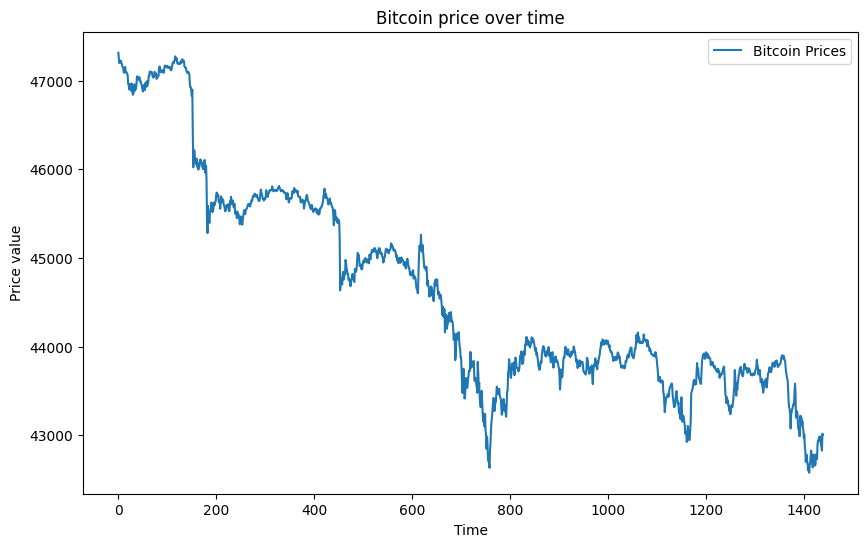

In [47]:
Bitcoin=df['Bitcoin']

plt.figure(figsize=(10,6))
plt.plot(Bitcoin,label='Bitcoin Prices')
plt. title('Bitcoin price over time')
plt.ylabel('Price value')
plt.xlabel('Time')
plt.legend()
plt.show()



In [48]:
# Aumented Dickey-Fuller (ADF) test to check stationarity
adf_result=adfuller(Bitcoin.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of Lags Used:", adf_result[2])
print("Number of Observations:", adf_result[3])
print("Critical Values:", adf_result[4])
print("IC Best Value:", adf_result[5])


ADF Statistic: -1.7084751092733752
p-value: 0.4267512208140877
Number of Lags Used: 4
Number of Observations: 1435
Critical Values: {'1%': np.float64(-3.4349151819757466), '5%': np.float64(-2.863556216004778), '10%': np.float64(-2.5678434198545568)}
IC Best Value: 15764.85243563458


**How interpret the results**

1. ADF Statistic: This is the test statistic calculated by the ADF test. Compare this value to the critical value. If the **ADF Statistic < Critical Value**, reject the null hypothesis (stationarity).

2. p-value: The probability of observing the given ADF statistic under the null hypothesis (H0: the series is non-stationary).If **p-value < 0.05**, reject the null hypothesis, indicating the series is stationary. 

3. Critical Values: These are thresholds at 1%, 5%, and 10% significance levels to compare with the ADF statistic. Use these to decide if the series is stationary. ADF Statistic < Critical Value.

4. Number of lags used: The number of lagged differences included in the test to account for autocorrelation in the series. Higher lags can reduce bias but may overfit. Ensure the lag length is reasonable (typically chosen by AIC or BIC).

5. Number of Observations: The number of usable data point after accounting for lagged differences. Gives context about how much data was used for the test.

6. IC Best Value: The information criterion value (e.g. AIC or BIC) used to select the optimal lag length. Lower values are better. Generally not critical for interpreting the stationarity result itselft.

**Answer**:
    
In our case the ADF statistic value is -1.70 > -3.34 / 2.86 /2.56, so we fail to reject the H0, meaning that the series is non-stationary.
If we go to the other parameters:
- p-value is 0.42 > 0.05 -> we cannot reject H0, reinforcing the conclusion that the series is non-stationary.
- The ADF statistic is greater than all the critical values, we cant reject H0.
- The IC best value is high, but this value is more relevant for selecting lag lenghts rather than interpreting stationarity.

In the graph, we observe a decreasing trend before the 800th observation, followed by a period of ". This sugesst non-stationary in the earlier part of the series, likely to the trend. A stationary transformation (e.g. log-returns or differencing) is necessary to remove this trend.

Based on the ADF statistic, p-value and the visual analysis, we conclude that the raw bitcoin price series is non-stationary.
Further transformations (e.g. log-return or differencing) are required to make the series stationary.


## b) Transform Bitcoin prices into negative log-returns and assess stationarity

- Compute negative log-returns.
- Plot the log-returns to observe their behavior.
- Apply the ADF test to assess stationarity.
- Plot the log-returns on a common scale for comparison with the raw prices.


**Why we are doing it?**:
- Log-returns are a standard transformation in financial modelling.
    1. They remove trends and stabilize variance, making the series more likely to be stationary.
    2. They allow for percentage-based interpretation of changes.
-  After this transformation, we reassess stationarity using the ADF test.

In [49]:
# Function to calculate the negative log-return
def negative_log_return(prices):
    return -np.log(prices /prices.shift(1))

log_return=negative_log_return(df['Bitcoin']).dropna()

log_return.head()

1    0.001468
2    0.000988
3   -0.000226
4    0.000034
5   -0.000391
Name: Bitcoin, dtype: float64

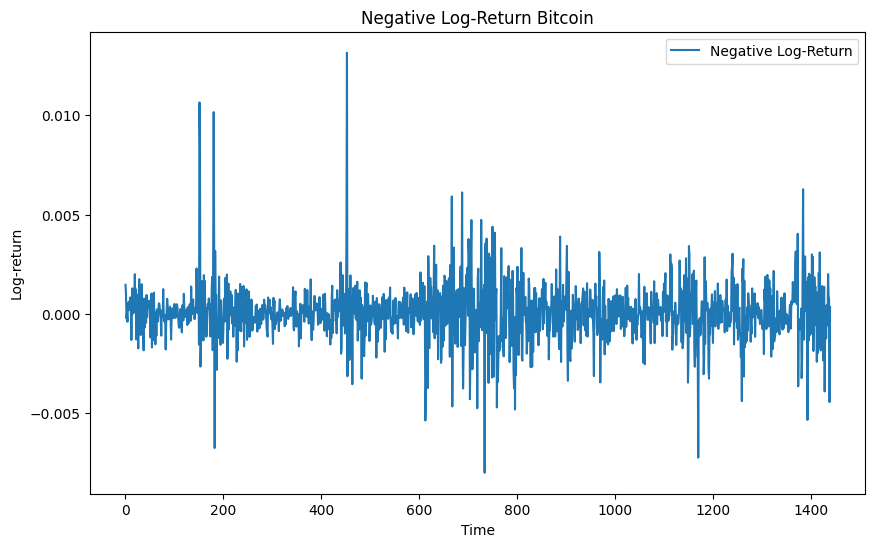

In [50]:
plt.figure(figsize=(10,6))
plt.plot(log_return, label="Negative Log-Return")
plt.title('Negative Log-Return Bitcoin')
plt.ylabel('Log-return')
plt.xlabel('Time')
plt.legend()
plt.show()

In [51]:
adf_result_log_returns=adfuller(log_return)

print("ADF Statistic:", adf_result_log_returns[0])
print("p-value:", adf_result_log_returns[1])
print("Number of Lags Used:", adf_result_log_returns[2])
print("Number of Observations:", adf_result_log_returns[3])
print("Critical Values:", adf_result_log_returns[4])
print("IC Best Value:", adf_result_log_returns[5])

ADF Statistic: -18.3263427145728
p-value: 2.2604761823692198e-30
Number of Lags Used: 3
Number of Observations: 1435
Critical Values: {'1%': np.float64(-3.4349151819757466), '5%': np.float64(-2.863556216004778), '10%': np.float64(-2.5678434198545568)}
IC Best Value: -14499.943945553749


**Answer**:

The p-value is less than 0.05, we can conclude the series is stationary. 
Also the ADF statistic is smaller than all the critical values, so we can reject the H0.

## c) Are the negative log-returns normally distributed?

- Plot a histogram of the log-returns.
- Use a Q-Q plot to visually check for Normality.
- Perform the Anderson-Darling test to statistically assess Normality.

**Why we are doing this?**

- Many financial models assume log-return are Normally distributed for simplicity.
- Testing Normality helps us determine if we can use such models or if alternatives (e.g. t-distribution) are needed.


In [52]:
from scipy.stats import norm, anderson
import statsmodels.api as sm

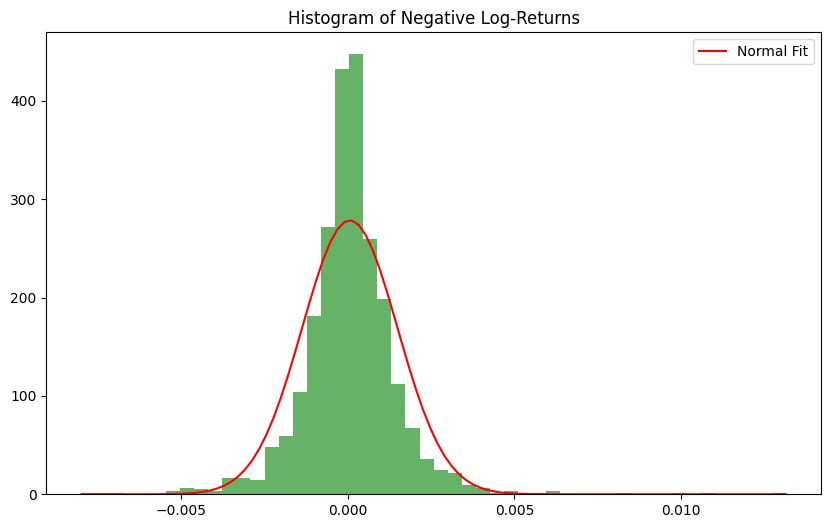

In [53]:
plt.figure(figsize=(10,6))
plt.hist(log_return, bins=50, density=True, alpha=0.6, color='g')
mu,sigma=norm.fit(log_return)
x=np.linspace(log_return.min(),log_return.max(),100)
plt.plot(x,norm.pdf(x,mu,sigma),'r',label='Normal Fit')
plt.title('Histogram of Negative Log-Returns')
plt.legend()
plt.show()

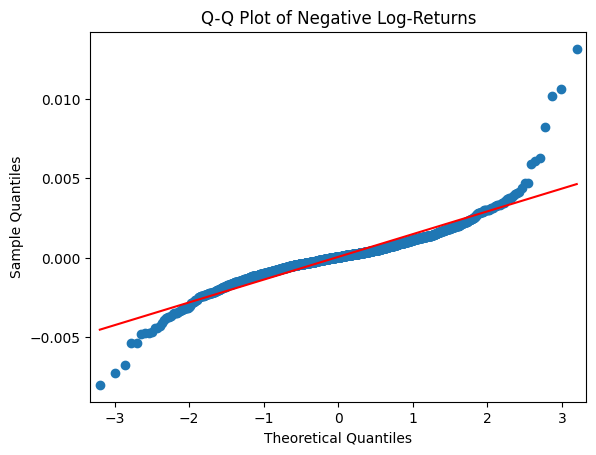

In [54]:
sm.qqplot(log_return,line='s')
plt.title('Q-Q Plot of Negative Log-Returns')
plt.show()

In [55]:
ad_test_result=anderson(log_return, dist='norm')
print("Anderson-Darling Statistic:", ad_test_result.statistic)
print("Critical Values:", ad_test_result.critical_values)
print("Significance Levels:", ad_test_result.significance_level)

Anderson-Darling Statistic: 26.277129760204843
Critical Values: [0.574 0.654 0.785 0.915 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


**Answer**:

The Anderson-Darling Statistic (26.2771) is far greater than all critical values at every significance level. For example:
- At 1% of significance level, the critical value is 1.089, but the statistic is 26.2771.
- This indicates that the null hypothesis can be rejected with very high confidence.

Conclusion:

- The data (negative log return) does not follow a normal distribution.
- This result strongly suggests significant deviations from Normality, like due to:
  - Heavy tails: Extreme values occur more frequently than a Normal distribution predicts.
  - Skewness: The distribution may not b symmetric.

**Why use the Anderson-Darling Test?**
The Anderson-Darling (A-D) test is a statistical test designed to evaluate whether a sample of data comes from a specific distribution (in this case, a Normal distribution). It is particularly sensitive to deviations in the tails of the distribution, making it well-suited for financial data, which often has heavy tails.

**How it works**:
- Null hypothesis (H0): The data follows a normal distribution.
- Alternative Hypothesis (H1): The data does not follow a normal distribution.
- The test calculates a statistic that quantifies how much the sample deviates from the expected normal distribution.
- Compare the test statistic to critical values at various significance levels. If the statistic exceeds the critical value at a given significance level (e.g. 5%), reject H0, concluding the data is not normal.

**Why choose Anderson-Darling over other test?**
- Sensitivity to Tails: The A-D test focuses on discrepancies in the tails, which is crucial for financial data where extreme values (e.g. crashes) are more common.
- Wide Applicability: Works for various sample sizes and is robust to minor data irregularities.



**Are there other ways to test for Normality?**

1. Shapiro-Wilk Test (if dataset < 500 observations):
- Null Hypothesis H0: The data is normally distributed.
- Strength: Powerful for small sample sizes.
- Limitation: Less effective for large datasets or detecting deviations in the tails.

In [56]:
from scipy.stats import shapiro

stat,p=shapiro(log_return)
print(f"Shapiro-Wilk Statistic: {stat},p-value:{p}")

Shapiro-Wilk Statistic: 0.8932103254068152,p-value:1.8486586676605757e-30


2. Kolmogoroc-Smirnov (K-S) Test (Quick comparisson of empirical vs. theoretical distributions):
- Null Hypothesis H0: The data is Normally distributed.
- Compares the empirical distribution to the theoretical distribution.
- Limitation: Less sensitive to deviations in the tails.


In [57]:
from scipy.stats import kstest
stat, p = kstest(log_return,'norm', args=(log_return.mean(),log_return.std()))
print(f"K-S Statistic: {stat}, p-value:{p}")

K-S Statistic: 0.08312292847161673, p-value:4.254610831136241e-09


3. Jarques-Bera Test (if you want to specifically assess skewness and kurtosis):

- Null Hypothesis H0: The data is normally distributed.
- Examines skewness and kurtosis of the data (how asymmetric and "peaked" the distribution is).
- Limitation: Not ideal for small sample sizes.

In [58]:
from scipy.stats import jarque_bera
stat,p=jarque_bera(log_return)
print(f"Jarque-Bera Statistic:{stat},p-value:{p}")

Jarque-Bera Statistic:8034.915324526111,p-value:0.0


4. Q-Q Plot (Quantile-Quantile plot) (Always, as a complement to statistical test):

- Visual diagnostic tool that compares the quantiles of your data against the quantiles of a Normal distribution.
- If the points lie along a straingt diagonal, the data is approximately Normal.

Already done before.

## d) Fit a t-distribution to the negative log returns and assess the fit using a Q-Q plot

- Fit a t-distribution to the negative log-returns.
- Generate a Q-Q plot for the t-distribution to compare its fit with the empirical data.
- Compare this Q-Q plot with the one for the Normal distribution (from step c) to determine which distribution fits better.

**Why we are doing this?**

- The t-distribution has heavier tails than the normal distribution, making it more suitable for modelling financial data with extreme events.
- By comparing Q-Q plots, we can visually assess which distribution (Normal vs t-distribution) better captures the characteristics of the log-returns, particularly in the tails.

In [63]:
from scipy.stats import t

t_params=t.fit(log_return)
dfr,loc,scale=t_params

print(f"Fitted t-distribution parameters: Degrees of Freedom={df},Location={loc}, Scale={scale}")

Fitted t-distribution parameters: Degrees of Freedom=1.9702555621789557,Location=4.867694889468271e-05, Scale=0.000759344905162981


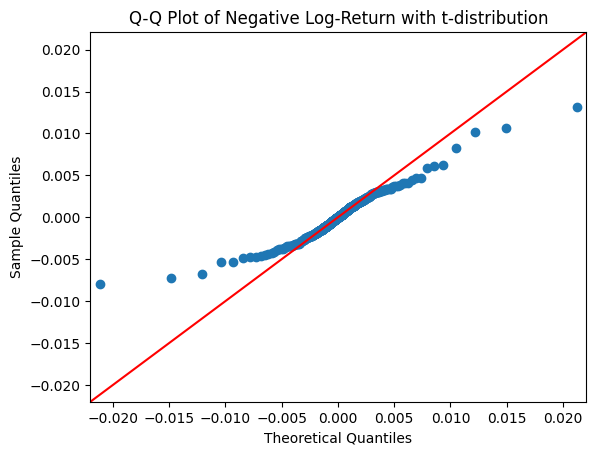

In [67]:
sm.qqplot(log_return,dist=t,distargs=(dfr,),loc=loc,scale=scale, line='45')
plt.title("Q-Q Plot of Negative Log-Return with t-distribution")
plt.show()

**Answer**:
- The t-distribution is a better-fit for Bitcoin log-returns compared to the Normal distribution, as seen in the Q-Q plot alignment and the inability of the Normal distribution to capture the heavy tails of the data.
- Extreme events are more common in Bitcoin log-return than what a Normal distribution predicts, and the t-distribution effectively accounts fot his.

## e) Comparing the Tails of the T-Distribution and Normal Distribution?

**What does comparing tails mean?** The tails of a distribution refer to the extreme ends (both left and right) where rare or extreme events are modeled. For financial data like bitcoin log-returns:

- The left tail represent extreme losses.
- The right represent extreme gains.

By comparing the densities of the t-distribution and the Normal distribution, we assess how well they capture the likelihood of extreme events.

**Why compare the Tails?** 

- The normal distribution assumes lighter tails, meaning extreme events (large deviations from the mean) are rare.
- The t-distribution, with its heavy tails, assigns higher probabilities to extreme values.
- For Bitcoin, a highly volatile asset, extreme events (large price swings) are frequent, so t-distribution is expected to better capture the data.
  
**How to compare the Densities**
We will:
- Plot the density curves of both the t-distribution and normal distribution.
- Focus on the behavior of the tails to observe which distribution assigns higher probabilities to extreme values.
- Analyze the probabilities of extreme events based on the shape of the curves.

In [68]:
x=np.linspace(log_return.min(),log_return.max(),500)

normal_density=norm.pdf(x,loc=log_return.mean(),scale=log_return.std())
t_density=t.pdf(x,dfr,loc=loc,scale=scale)

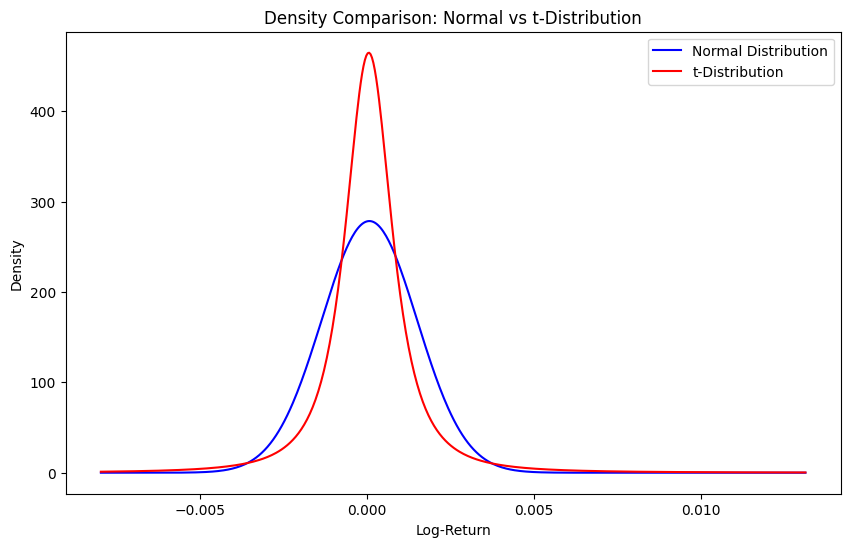

In [69]:
plt.figure(figsize=(10,6))
plt.plot(x, normal_density,label='Normal Distribution', color='blue')
plt.plot(x,t_density,label='t-Distribution',color='red')
plt.title('Density Comparison: Normal vs t-Distribution')
plt.xlabel('Log-Return')
plt.ylabel('Density')
plt.legend()
plt.show()

**Analysis**:

1. **Central Region of the Distributions**: In the center (around a log-return of 0), the t-distribution density is slightly higher than the normal distribution.
   - This reflects that the t-distribution assigns a higher probability to values close to the mean, making it more peaked.
   - This is consistent with Bitcoin's log-return, where small fluctuations are common.

2. **Tails of the Distributions**: 

In the tails (both left and right):
   - The t-distribution has heavier tails than the normal distribution, meaning it assigns a higher probability to extreme events (large positivie or negative log-return).
   - The normal distribution underestimates the likelihood of extreme events, as its density quickly approaches zero in the tails.
This is crucial for bitcoin data, as extreme events (e.g. crashes or surges) occur more frequently than a normal distribution would predict.

3. **Interpretation for Financial Risk**:
The t-distribution better captures the heavy-tailed nature of bitcoin log-returns, which is essential for risk modelling.
   - For example: in calculating risk metrics like Value at Risk (VaR) or expected shortfall (ES), the t-distribution would provide more realistic estimates for the probability of extreme losses or gains.

**Answer**:
The t-distribution is more suitable dor modeling bitcoin log-return because it captures the frequent extreme events (both losses and gains) better than the normal distribution.